### Lab 7 + 8

In [55]:
# Necessary imports 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import scipy
from scipy import stats
import h5py
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from scipy.stats import poisson
from scipy.stats import norm
import scipy.stats as st

In [5]:
# loading in the data
file_qcd = open ("qcd_100000_pt_1000_1200.pkl",'rb')
file_higgs = open ("higgs_100000_pt_1000_1200.pkl",'rb')
dict_qcd = pickle.load(file_qcd)
dict_higgs = pickle.load(file_higgs)

print(dict_qcd.keys())
print(dict_higgs.keys())

# background dataset QCD
pt_qcd = dict_qcd['pt']
eta_qcd = dict_qcd['eta']
phi_qcd = dict_qcd['phi']
mass_qcd = dict_qcd['mass']
ee2_qcd = dict_qcd['ee2']
ee3_qcd = dict_qcd['ee3']
d2_qcd = dict_qcd['d2']
angularity_qcd = dict_qcd['angularity']
t1_qcd = dict_qcd['t1']
t2_qcd = dict_qcd['t2']
t3_qcd = dict_qcd['t3']
t21_qcd = dict_qcd['t21']
t32_qcd = dict_qcd['t32']
KtDeltaR_qcd = dict_qcd['KtDeltaR']

# signal dataset higgs
pt_higgs = dict_higgs['pt']
eta_higgs = dict_higgs['eta']
phi_higgs = dict_higgs['phi']
mass_higgs = dict_higgs['mass']
ee2_higgs = dict_higgs['ee2']
ee3_higgs = dict_higgs['ee3']
d2_higgs = dict_higgs['d2']
angularity_higgs = dict_higgs['angularity']
t1_higgs = dict_higgs['t1']
t2_higgs = dict_higgs['t2']
t3_higgs = dict_higgs['t3']
t21_higgs = dict_higgs['t21']
t32_higgs = dict_higgs['t32']
KtDeltaR_higgs = dict_higgs['KtDeltaR']

print(mass_higgs.size)
print(mass_qcd.size)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
100000
100000


### Problem 7.1: Stacked histogram plot for feature variable: mass

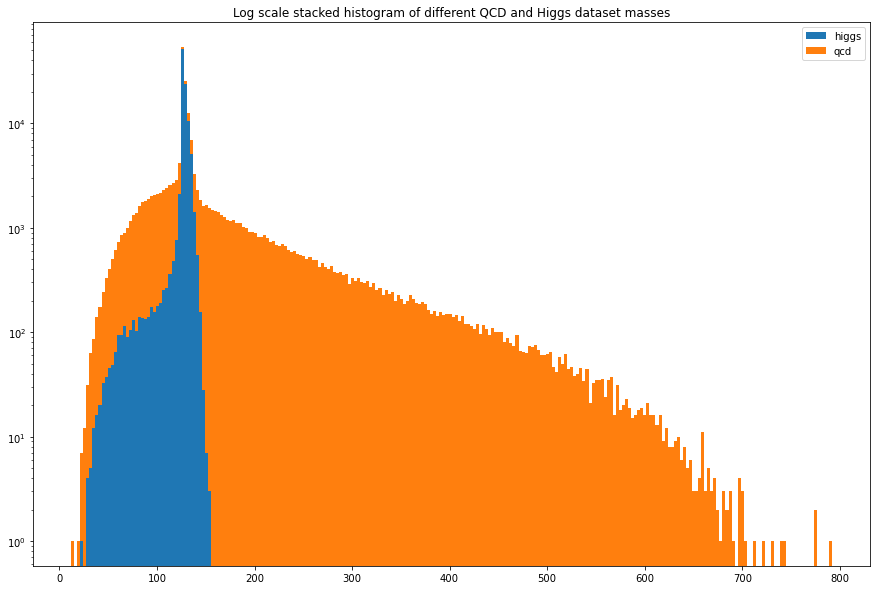

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.set_yscale('log')
ax.hist([higgs_file['mass'],qcd_file['mass']], stacked=True, bins = 250, label=["higgs", "qcd"])
ax.set_title("Log scale stacked histogram of different QCD and Higgs dataset masses")
ax.legend()

In [11]:
n_higgs = 50
n_qcd = 2000
poisson_sigma = stats.poisson.cdf(n_higgs + n_qcd, n_qcd)
poisson_sig = stats.norm.ppf(poisson_sigma)
print("The significance calculation using Poisson statistics: " + str(poisson_sig))

The significance calculation using Poisson statistics: 1.1282230087754428


In [12]:
sig = n_higgs / np.sqrt(n_qcd)
print("The significance calculation using the approximation ratio:" + str(sig))

The significance calculation using the approximation ratio:1.118033988749895


In [13]:
print("The difference between the two significances: " + str(poisson_sig - sig))

The difference between the two significances: 0.01018902002554789


The difference between the approximation and the Poisson calculation is incredibly small, due to the Central Limit Theorem.

### Problem 7.2: Identifying mass cuts to optimize expected significance

To identify the most meaningful mass cuts, I first want to calculate the mean.

In [14]:
np.mean(higgs_file["mass"])

126.66383222477353

Next, I will systematically check cuts around the region where the mean lies.

In [15]:
def sig_calc(min, max):
    qcd_temp = np.array(qcd_file["mass"])
    higgs_temp = np.array(higgs_file["mass"])
    n_qcd = np.size(qcd_temp[np.where((qcd_temp >= min) & (qcd_temp <= max))])
    n_higgs = np.size(higgs_temp[np.where((higgs_temp >= min) & (higgs_temp <= max))])
    #put back into our ratio of 50 to 2000
    sig = ((n_higgs / 100000) * 50) / np.sqrt((n_qcd / 100000) * 2000)
    return sig

In [16]:
print("Significance between 120, 129 = " + str(sig_calc(123, 129)))
print("Significance between 123, 131 = " + str(sig_calc(123, 131)))
print("Significance between 123, 130 = " + str(sig_calc(123, 130)))
print("Significance between 123, 129 = " + str(sig_calc(123, 129)))
print("Significance between 123, 128 = " + str(sig_calc(123, 128)))
print("Significance between 123, 127 = " + str(sig_calc(123, 127)))
print()
print("Significance between 116.5, 131.5 = " + str(sig_calc(116.5, 131.5)))
print("Significance between 120, 130 = " + str(sig_calc(120, 130)))
print("Significance between 121, 130 = " + str(sig_calc(121, 130)))
print("Significance between 122, 130 = " + str(sig_calc(122, 130)))
print("Significance between 123, 130 = " + str(sig_calc(123, 130)))
print("Significance between 124, 130 = " + str(sig_calc(124, 130)))
print("Significance between 125, 130 = " + str(sig_calc(125, 130)))
print("Significance between 126, 130 = " + str(sig_calc(126, 130)))
print()
print("Significance between 120, 129 = " + str(sig_calc(120, 129)))
print("Significance between 121, 129 = " + str(sig_calc(121, 129)))
print("Significance between 122, 129 = " + str(sig_calc(122, 129)))
print("Significance between 123, 129 = " + str(sig_calc(123, 129)))
print("Significance between 124, 129 = " + str(sig_calc(124, 129)))
print("Significance between 125, 129 = " + str(sig_calc(125, 129)))
print("Significance between 126, 129 = " + str(sig_calc(126, 129)))
print()
print("Significance between 120, 128 = " + str(sig_calc(120, 128)))
print("Significance between 121, 128 = " + str(sig_calc(121, 128)))
print("Significance between 122, 128 = " + str(sig_calc(122, 128)))
print("Significance between 123, 128 = " + str(sig_calc(123, 128)))
print("Significance between 124, 128 = " + str(sig_calc(124, 128)))
print("Significance between 125, 128 = " + str(sig_calc(125, 128)))
print("Significance between 126, 128 = " + str(sig_calc(126, 128)))

Significance between 120, 129 = 3.926243676981313
Significance between 123, 131 = 3.901028615254701
Significance between 123, 130 = 3.943137907471722
Significance between 123, 129 = 3.926243676981313
Significance between 123, 128 = 3.7569373078284096
Significance between 123, 127 = 3.3216564279060092

Significance between 116.5, 131.5 = 2.940292875912613
Significance between 120, 130 = 3.3475406344693024
Significance between 121, 130 = 3.514016524481035
Significance between 122, 130 = 3.704557305085909
Significance between 123, 130 = 3.943137907471722
Significance between 124, 130 = 4.225651989421637
Significance between 125, 130 = 4.2380247446446635
Significance between 126, 130 = 3.2052314594317215

Significance between 120, 129 = 3.255606631027935
Significance between 121, 129 = 3.4378239320496053
Significance between 122, 129 = 3.651060377175072
Significance between 123, 129 = 3.926243676981313
Significance between 124, 129 = 4.267241718150673
Significance between 125, 129 = 4.3354

Looking at the different cuts, we can observe that the signifcance between 125 and 129 gives the highest significance of 4.3354.

### Problem 7.3: Two sets of histogram plots

Set A: Plots with no event selection:

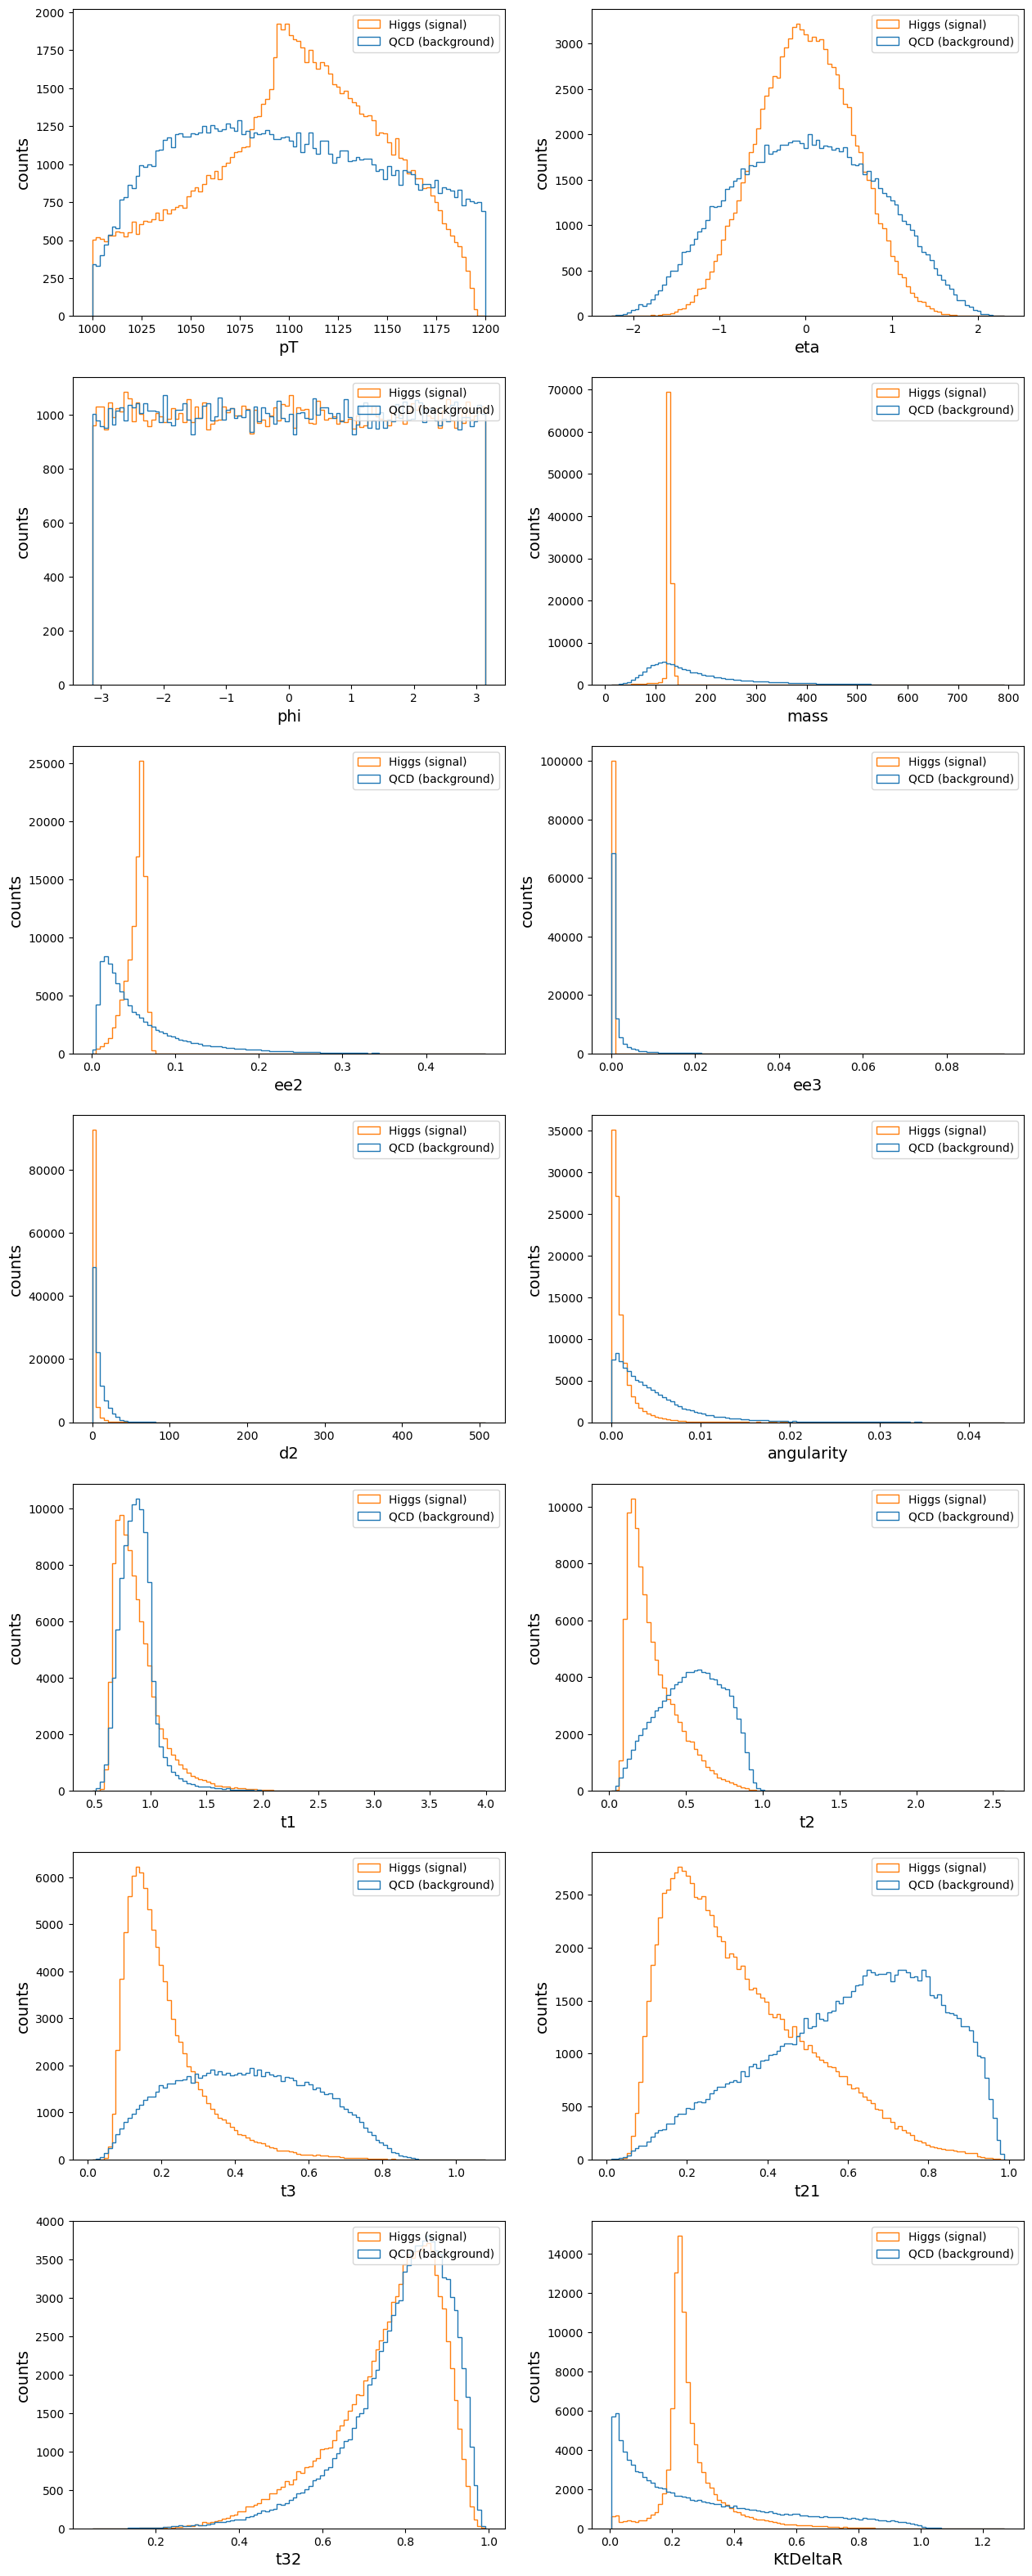

In [9]:
# create a figure with 14 subplots
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist([pt_qcd, pt_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist([eta_qcd, eta_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist([phi_qcd, phi_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist([mass_qcd, mass_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist([ee2_qcd, ee2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist([ee3_qcd, ee3_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist([d2_qcd, d2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist([angularity_qcd, angularity_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist([t1_qcd, t1_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist([t2_qcd, t2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist([t3_qcd, t3_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist([t21_qcd, t21_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist([t32_qcd, t32_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist([KtDeltaR_qcd, KtDeltaR_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

From the looking at the plots above, we can see that the feature t21 is also very discriminatory, like the mass.

In [54]:
def evalSig_t21(low, high, total = 100000):
    expected_higgs = 50
    expected_qcd = 2000
    
    # calculate mean in this mass cut for higgs data
    counts_higgs = 0
    for i in t21_higgs:
        if (i > low and i <= high):
            counts_higgs = counts_higgs + 1
    
    # calculate mean in this mass cut for qcd data
    counts_qcd = 0
    for j in t21_qcd:
        if (j > low and j <= high):
            counts_qcd = counts_qcd + 1
    
    N_higgs = counts_higgs* (expected_higgs / total)
    N_qcd = counts_qcd * (expected_qcd / total)
    
    sig = N_higgs / np.sqrt(N_qcd)
    
    return sig

In [53]:
# caclulating significances of different t21 cuts to find maximum significance
print("Significance of t21 cut (0,0.4): " + str(round(evalSig_t21(0,0.4),3)))
print("Significance of t21 cut (0.4,0.8): " + str(round(evalSig_t21(0.4,0.8),3)))
print("Significance of t21 cut (0.1,0.3): " + str(round(evalSig_t21(0.1,0.3),3)))

Significance of t21 cut (0,0.4): 1.787
Significance of t21 cut (0.4,0.8): 0.435
Significance of t21 cut (0.1,0.3): 1.768


In [16]:
print("The highest significance using t21 cuts: " + str(round(evalSig_t21(0.06,0.34),3)) + " with t21 cut (0.06,0.34)")

The highest significance using t21 cuts: 1.825 with t21 cut (0.06,0.34)


In [19]:
# set the optimal range
optimalMass_low = 125
optimalMass_high = 129

# create optimal arrays for higgs and qcd data to select the data within this range
optimal_higgs = (mass_higgs > optimalMass_low) & (mass_higgs < optimalMass_high)
optimal_qcd = (mass_qcd > optimalMass_low) & (mass_qcd < optimalMass_high)
massCut_higgs = mass_higgs[optimal_higgs]
massCut_qcd = mass_qcd[optimal_qcd]

Set B: Plots with optimal mass cuts (125, 129):

In [52]:
# set the optimal range
optimalMass_low = 125
optimalMass_high = 129

optimal_higgs = (mass_higgs > optimalMass_low) & (mass_higgs < optimalMass_high)
optimal_qcd = (mass_qcd > optimalMass_low) & (mass_qcd < optimalMass_high)
massCut_higgs = mass_higgs[optimal_higgs]
massCut_qcd = mass_qcd[optimal_qcd]

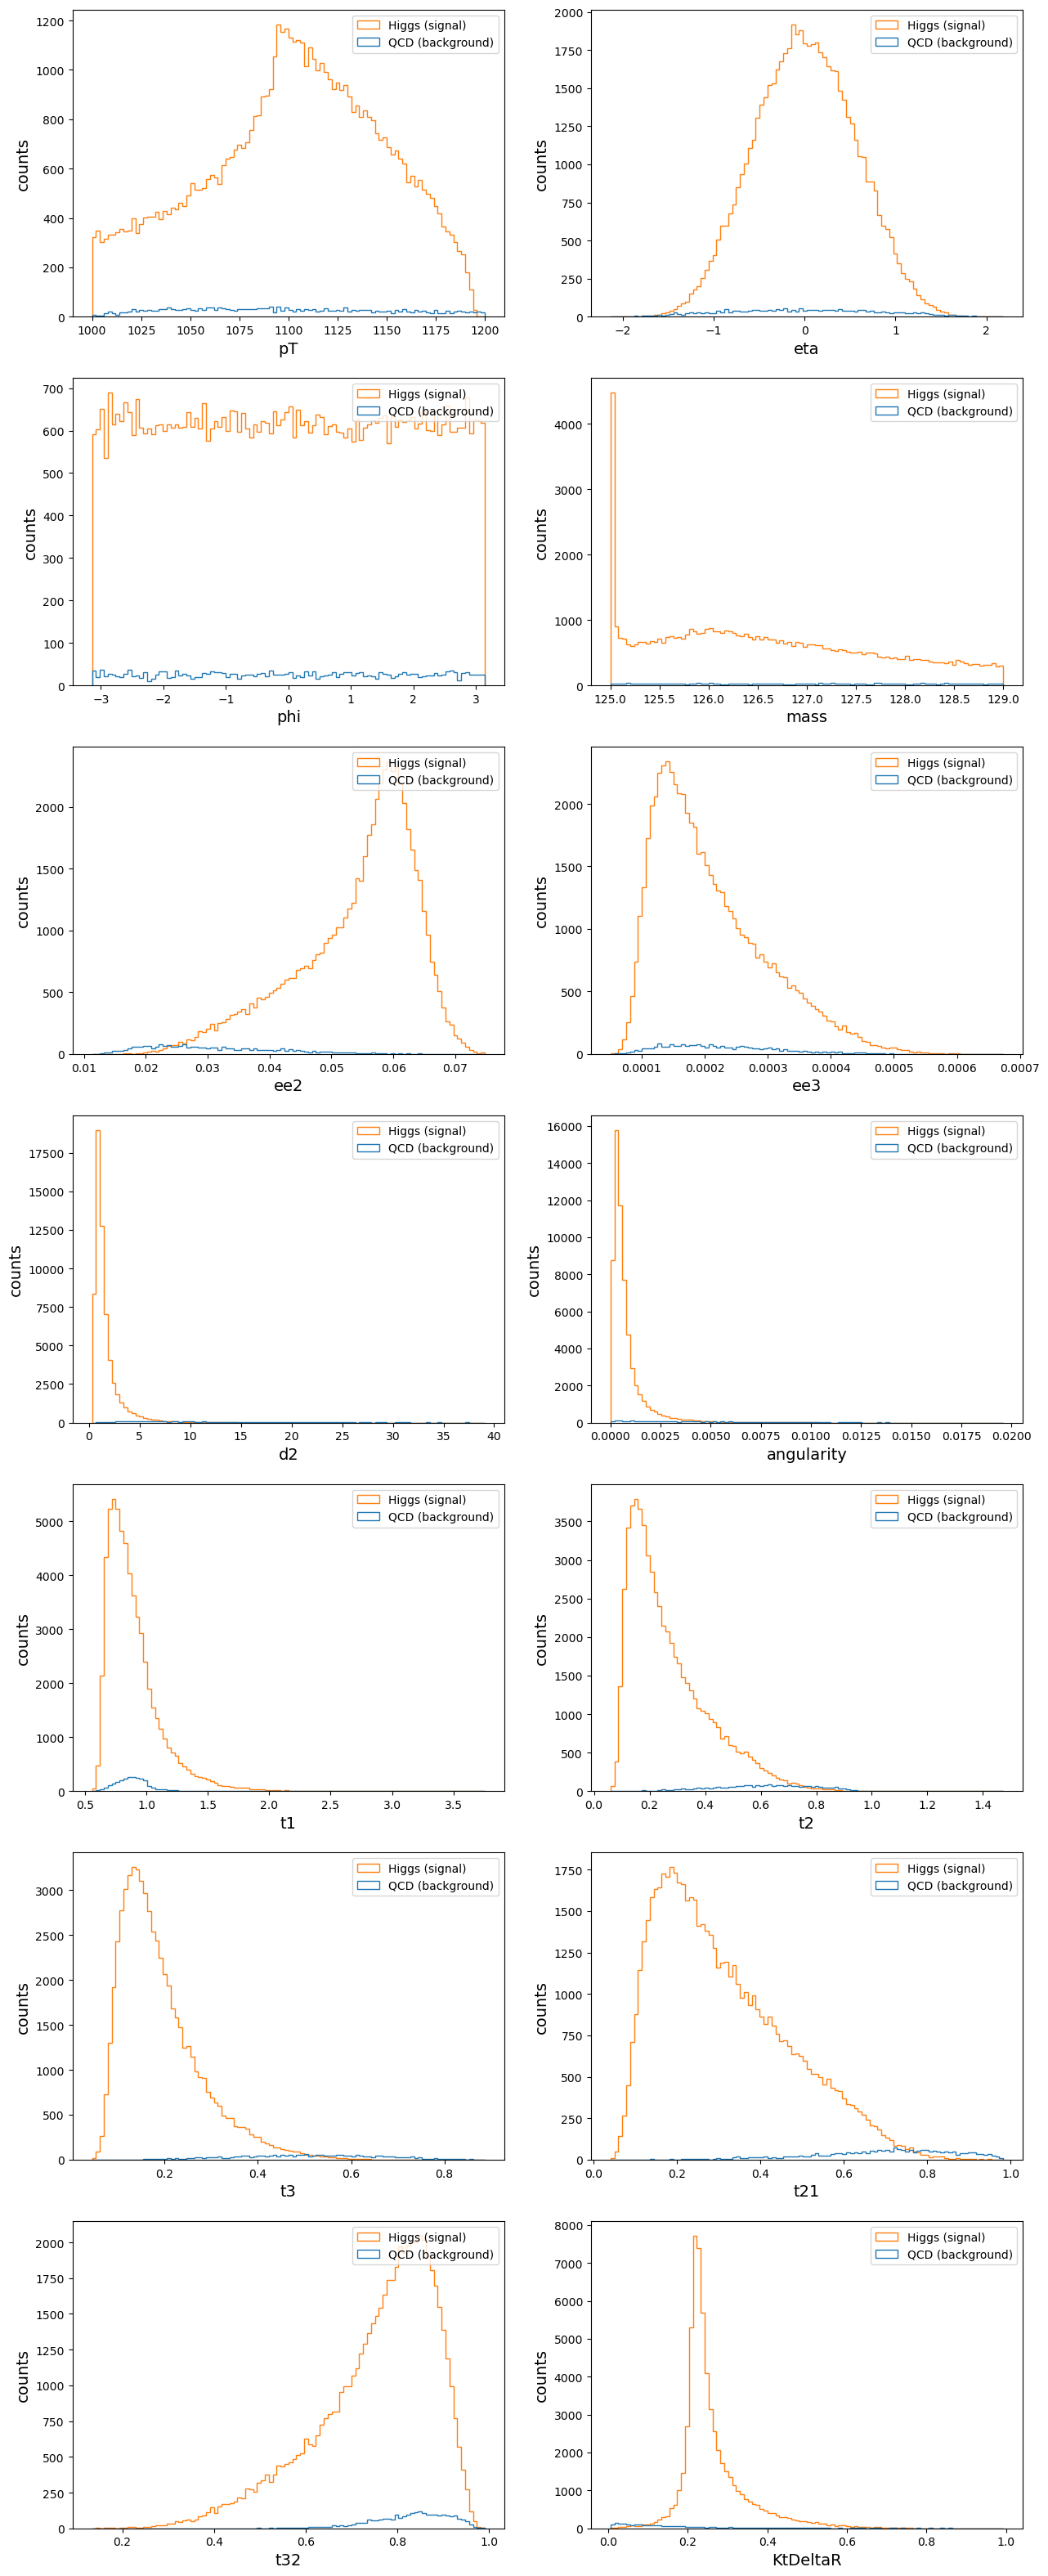

In [21]:
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist([pt_qcd[optimal_qcd], pt_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist([eta_qcd[optimal_qcd], eta_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist([phi_qcd[optimal_qcd], phi_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist([mass_qcd[optimal_qcd], mass_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist([ee2_qcd[optimal_qcd], ee2_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist([ee3_qcd[optimal_qcd], ee3_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist([d2_qcd[optimal_qcd], d2_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist([angularity_qcd[optimal_qcd], angularity_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist([t1_qcd[optimal_qcd], t1_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist([t2_qcd[optimal_qcd], t2_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist([t3_qcd[optimal_qcd], t3_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist([t21_qcd[optimal_qcd], t21_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist([t32_qcd[optimal_qcd], t32_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist([KtDeltaR_qcd[optimal_qcd], KtDeltaR_higgs[optimal_higgs]], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

From observing the above plots, it is apparant that each plot drastically increased in discriminatory power. The amount of Higgs data that we can see compared to the small amount of background is very large.

### Problem 7.4: Optimize event selections with multiple features

From the previous part, I chose the feature d2 to use as another cut.

In [23]:
def evalSig_d2(low, high, total = 100000):
    expected_higgs = 50
    expected_qcd = 2000
    
    # calculate mean in this mass cut for higgs data
    counts_higgs = 0
    for i in d2_higgs[optimal_higgs]:
        if (i > low and i <= high):
            counts_higgs = counts_higgs + 1
    
    # calculate mean in this mass cut for qcd data
    counts_qcd = 0
    for j in d2_qcd[optimal_qcd]:
        if (j > low and j <= high):
            counts_qcd = counts_qcd + 1
    

    N_higgs = counts_higgs* (expected_higgs / total)
    N_qcd = counts_qcd * (expected_qcd / total)
    
    sig = N_higgs / np.sqrt(N_qcd)
    
    return sig

In [24]:
print("Significance of d2 cut (0,5): " + str(round(evalSig_d2(0,5),3)))
print("Significance of d2 cut (5,10): " + str(round(evalSig_d2(5,10),3)))
print("Significance of d2 cut (3,10): " + str(round(evalSig_d2(3,10),3)))

Significance of d2 cut (0,5): 8.598
Significance of d2 cut (5,10): 0.228
Significance of d2 cut (3,10): 0.607


In [25]:
print("The highest significance using d2 cuts: " + str(round(evalSig_d2(0.4,1.34),3)) + " with d2 cut (0.4,1.34)")

The highest significance using d2 cuts: 38.924 with d2 cut (0.4,1.34)


### Problem 8.1: High luminosity data

In [29]:
# high luminosity data
highLumi = pd.read_hdf("data_highLumi_pt_1000_1200.h5")
data_highLumi = highLumi.to_numpy()
pt_highLumi = data_highLumi[:,0]
eta_highLumi = data_highLumi[:,1]
phi_highLumi = data_highLumi[:,2]
mass_highLumi = data_highLumi[:,3]
ee2_highLumi = data_highLumi[:,4]
ee3_highLumi = data_highLumi[:,5]
d2_highLumi = data_highLumi[:,6]
angularity_highLumi = data_highLumi[:,7]
t1_highLumi = data_highLumi[:,8]
t2_highLumi = data_highLumi[:,9]
t3_highLumi = data_highLumi[:,10]
t21_highLumi = data_highLumi[:,11]
t32_highLumi = data_highLumi[:,12]
KtDeltaR_highLumi = data_highLumi[:,13]

# low luminosity data
lowLumi = pd.read_hdf("data_lowLumi_pt_1000_1200.h5")
data_lowLumi = lowLumi.to_numpy()
pt_lowLumi = data_lowLumi[:,0]
eta_lowLumi = data_lowLumi[:,1]
phi_lowLumi = data_lowLumi[:,2]
mass_lowLumi = data_lowLumi[:,3]
ee2_lowLumi = data_lowLumi[:,4]
ee3_lowLumi = data_lowLumi[:,5]
d2_lowLumi = data_lowLumi[:,6]
angularity_lowLumi = data_lowLumi[:,7]
t1_lowLumi = data_lowLumi[:,8]
t2_lowLumi = data_lowLumi[:,9]
t3_lowLumi = data_lowLumi[:,10]
t21_lowLumi = data_lowLumi[:,11]
t32_lowLumi = data_lowLumi[:,12]
KtDeltaR_lowLumi = data_lowLumi[:,13]

print(pt_highLumi.size)
observedYields_highLumi = pt_highLumi.size
print(pt_lowLumi.size)
observedYields_lowLumi = pt_lowLumi.size

4066
442


Background = QCD data, signal = Higgs data. 

Normalizing the higgs and qcd data to the observed yields meaning the sum of all the higgs data and the sum of all the qcd data should both equal to the number of data points in the pseudo data, in this case 4066. To do that, I rescaled the y values of higgs data and qcd data by multiplying 4066/100000.

In order to normalize the Higgs and QCD data to the observed data:

Sum of higgs data + qcd data = pseudo data = 4066. Therefore, we must rescale the y values of the Higgs data and QCD data by multiplying by 4066/100000.

In [31]:
weights_highLumi = np.full(100000, observedYields_highLumi/100000); # create an array of shape = 100000, filled with 4066
weights_lowLumi = np.full(100000, observedYields_lowLumi/100000); # create an array of shape = 100000, fiiled with 442

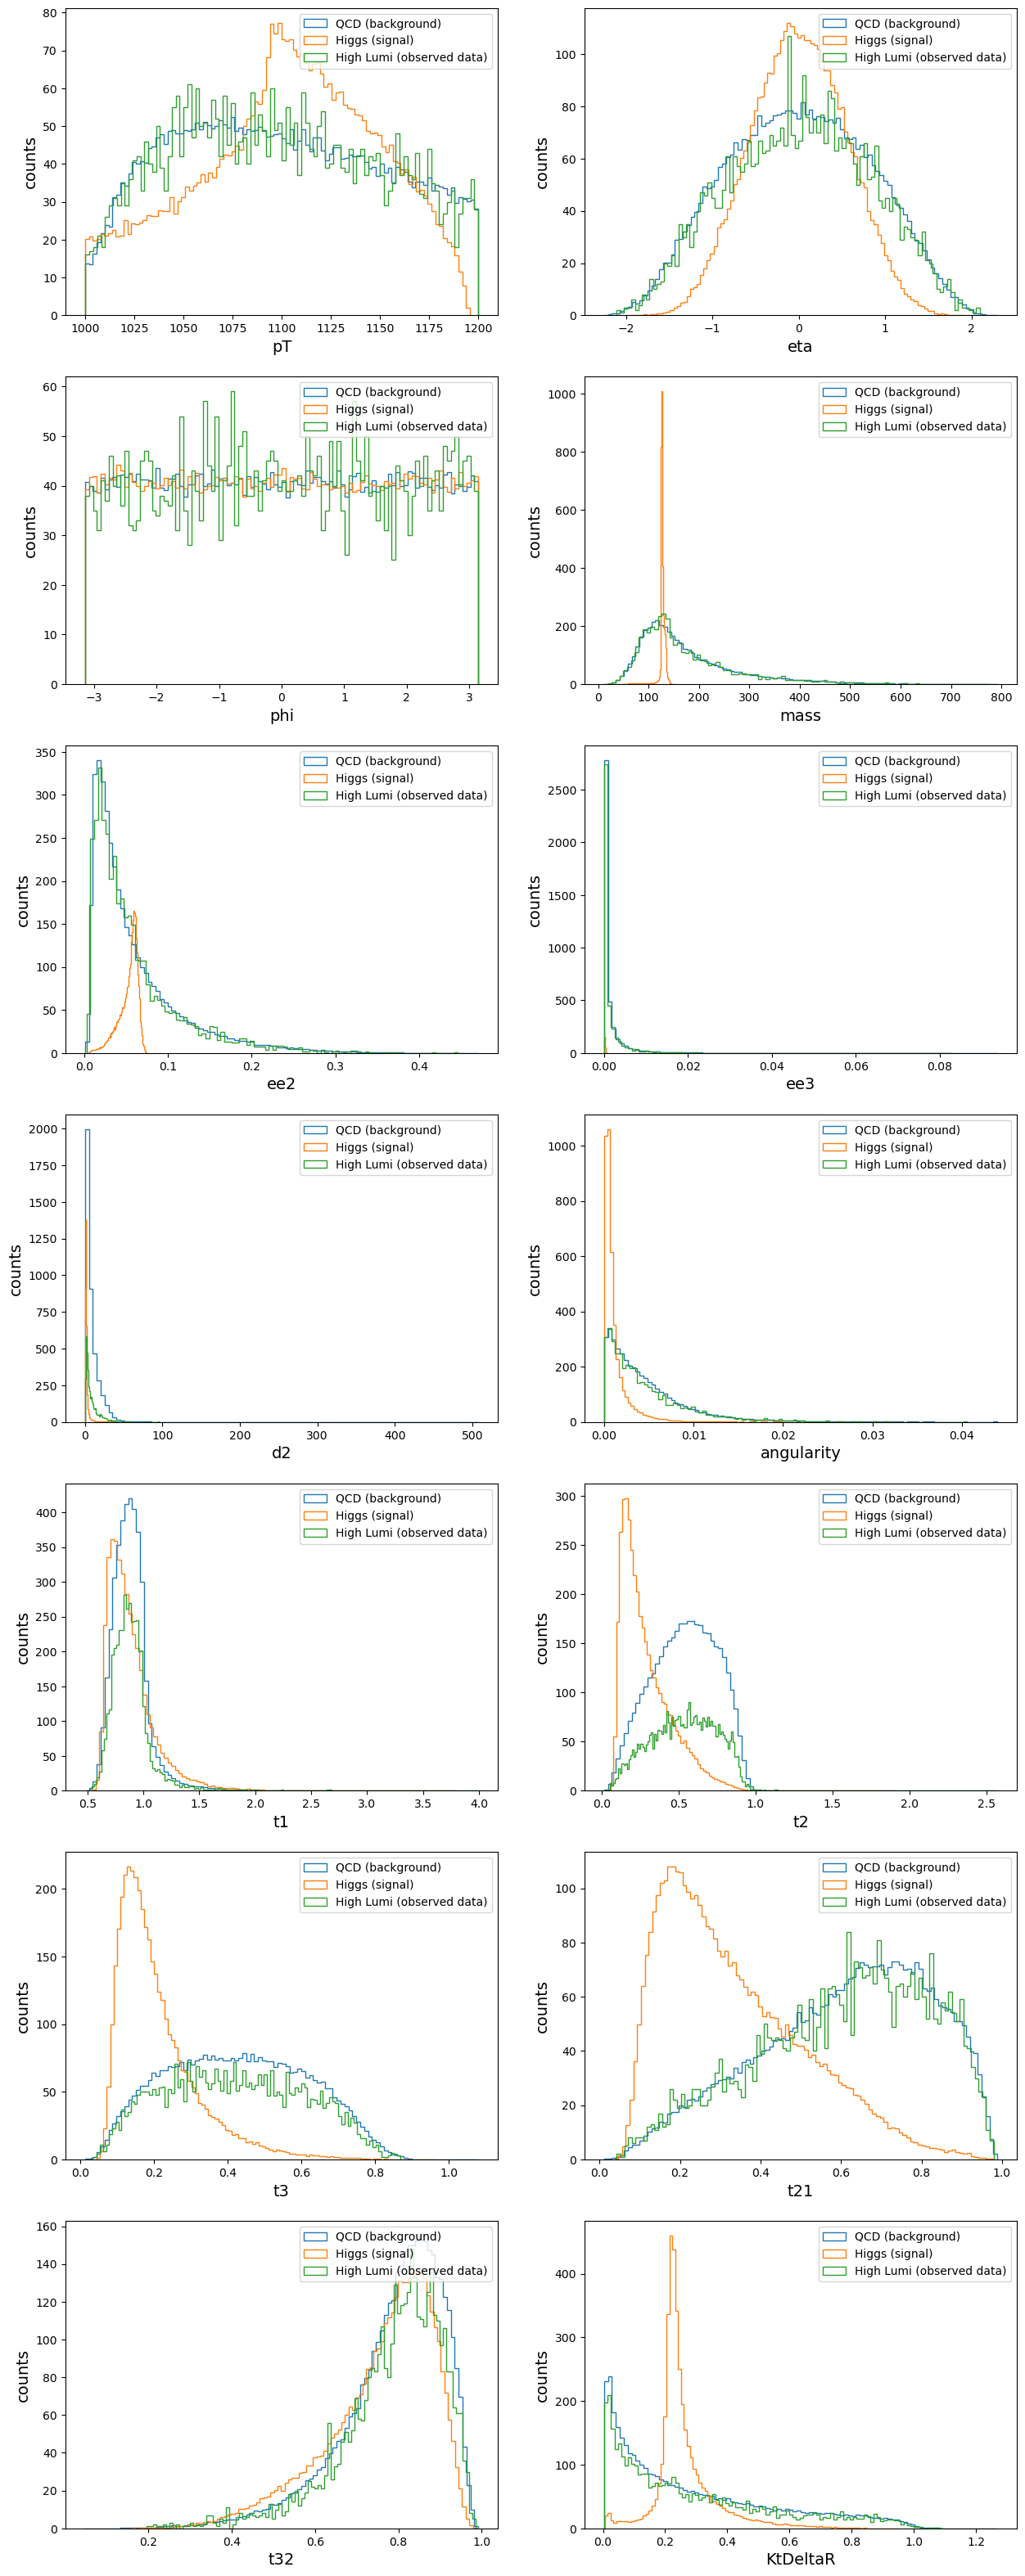

In [33]:
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist(pt_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[0,0].hist(pt_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[0,0].hist(pt_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist(eta_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[0,1].hist(eta_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[0,1].hist(eta_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist(phi_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[1,0].hist(phi_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[1,0].hist(phi_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist(mass_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[1,1].hist(mass_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[1,1].hist(mass_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist(ee2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[2,0].hist(ee2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[2,0].hist(ee2_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist(ee3_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[2,1].hist(ee3_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[2,1].hist(ee3_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist(d2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[3,0].hist(d2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[3,0].hist(d2_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist(angularity_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[3,1].hist(angularity_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[3,1].hist(angularity_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist(t1_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[4,0].hist(t1_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[4,0].hist(t1_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist(t2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[4,1].hist(t2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[4,1].hist(t2_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist(t3_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[5,0].hist(t3_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[5,0].hist(t3_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist(t21_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[5,1].hist(t21_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[5,1].hist(t21_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist(t32_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[6,0].hist(t32_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[6,0].hist(t32_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist(KtDeltaR_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_highLumi);
ax[6,1].hist(KtDeltaR_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_highLumi);
ax[6,1].hist(KtDeltaR_highLumi, bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

Using the optimal mass cut from the previous lab: (125, 129)

In [35]:
optimal_highLumi = (mass_highLumi > optimalMass_low) & (mass_highLumi < optimalMass_high)

optimal_weight = pt_highLumi[optimal_highLumi].size/100000
print(pt_qcd[optimal_qcd].size)
print(pt_higgs[optimal_higgs].size)

2526
61630


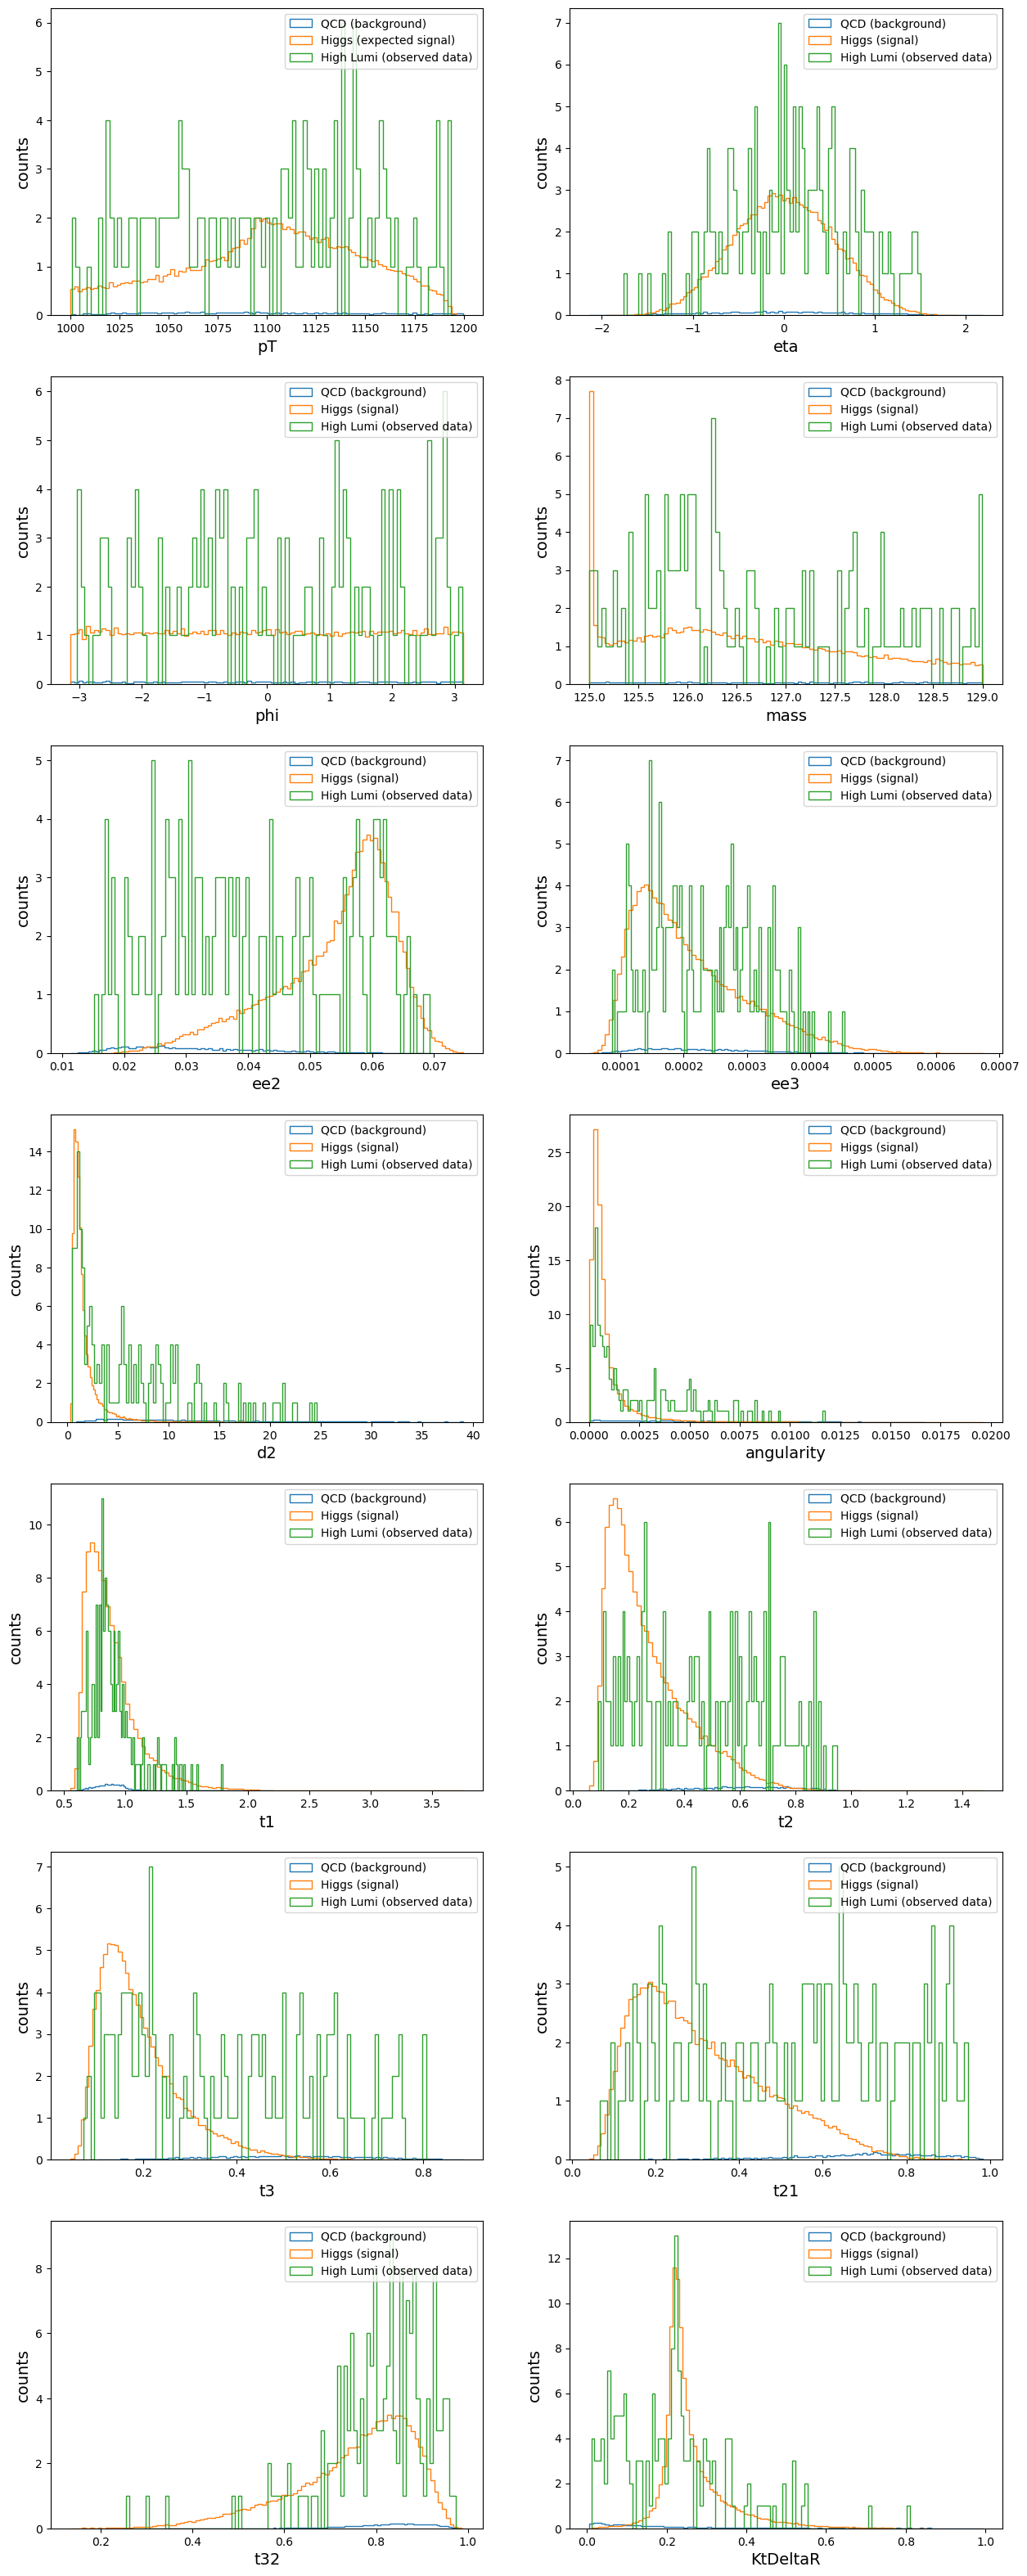

In [36]:
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist(pt_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(pt_qcd[optimal_qcd].size,optimal_weight));
ax[0,0].hist(pt_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (expected signal)"], weights = np.full(pt_higgs[optimal_higgs].size,optimal_weight));
ax[0,0].hist(pt_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist(eta_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(eta_qcd[optimal_qcd].size, optimal_weight));
ax[0,1].hist(eta_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(eta_higgs[optimal_higgs].size,optimal_weight));
ax[0,1].hist(eta_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist(phi_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(phi_qcd[optimal_qcd].size, optimal_weight));
ax[1,0].hist(phi_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(phi_higgs[optimal_higgs].size,optimal_weight));
ax[1,0].hist(phi_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist(mass_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(mass_qcd[optimal_qcd].size, optimal_weight));
ax[1,1].hist(mass_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(mass_higgs[optimal_higgs].size, optimal_weight));
ax[1,1].hist(mass_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist(ee2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(ee2_qcd[optimal_qcd].size, optimal_weight));
ax[2,0].hist(ee2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(ee2_higgs[optimal_higgs].size, optimal_weight));
ax[2,0].hist(ee2_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist(ee3_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(ee3_qcd[optimal_qcd].size, optimal_weight));
ax[2,1].hist(ee3_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(ee3_higgs[optimal_higgs].size, optimal_weight));
ax[2,1].hist(ee3_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist(d2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(d2_qcd[optimal_qcd].size, optimal_weight));
ax[3,0].hist(d2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(d2_qcd[optimal_higgs].size, optimal_weight));
ax[3,0].hist(d2_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist(angularity_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(angularity_qcd[optimal_qcd].size, optimal_weight));
ax[3,1].hist(angularity_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(angularity_higgs[optimal_higgs].size, optimal_weight));
ax[3,1].hist(angularity_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist(t1_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t1_qcd[optimal_qcd].size, optimal_weight));
ax[4,0].hist(t1_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t1_higgs[optimal_higgs].size, optimal_weight));
ax[4,0].hist(t1_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist(t2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t2_qcd[optimal_qcd].size, optimal_weight));
ax[4,1].hist(t2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t2_higgs[optimal_higgs].size, optimal_weight));
ax[4,1].hist(t2_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist(t3_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t3_qcd[optimal_qcd].size, optimal_weight));
ax[5,0].hist(t3_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t3_higgs[optimal_higgs].size, optimal_weight));
ax[5,0].hist(t3_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist(t21_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t21_qcd[optimal_qcd].size, optimal_weight));
ax[5,1].hist(t21_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t21_higgs[optimal_higgs].size, optimal_weight));
ax[5,1].hist(t21_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist(t32_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t32_qcd[optimal_qcd].size, optimal_weight));
ax[6,0].hist(t32_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t32_higgs[optimal_higgs].size, optimal_weight));
ax[6,0].hist(t32_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist(KtDeltaR_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(KtDeltaR_qcd[optimal_qcd].size, optimal_weight));
ax[6,1].hist(KtDeltaR_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(KtDeltaR_higgs[optimal_higgs].size, optimal_weight));
ax[6,1].hist(KtDeltaR_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

Comparing expected significance vs observed significance:

In [50]:
def evalSig_mass(low, high, total = 100000): 
    
    expected_higgs = 50 
    expected_qcd = 2000 
    
    # calculate mean in this mass cut for higgs data
    counts_higgs = 0
    for i in mass_higgs:
        if (i > low and i <= high):
            counts_higgs = counts_higgs + 1
    
    # calculate mean in this mass cut for qcd data
    counts_qcd = 0
    for j in mass_qcd:
        if (j > low and j <= high):
            counts_qcd = counts_qcd + 1
    
    N_higgs = counts_higgs* (expected_higgs / total)
    N_qcd = counts_qcd * (expected_qcd / total)
    
    sig = N_higgs / np.sqrt(N_qcd)
    
    return sig

In [51]:
def evalObservedSig_mass(low, high, total = 100000): 
    
    counts_higgs = 0
    for i in mass_higgs:
        if (i > low and i <= high):
            counts_higgs = counts_higgs + 1
            
    counts_highLumi = 0
    for k in mass_highLumi:
        if (k > low and k <= high):
            counts_highLumi = counts_highLumi + 1
            
    N_higgs = counts_higgs* (50 / total)
    N_qcd = counts_highLumi * (2050 / 4066)
    
    sig = N_higgs / np.sqrt(N_qcd)
    
    return sig

In [44]:
print("Expected significance in mass cut (125,129): " + str(round(evalSig_mass(125,129),3)))
print("Observed significance in mass cut (125,129): " + str(round(evalObservedSig_mass(125,129),3)))

Expected significance in mass cut (125,129): 4.335
Observed significance in mass cut (125,129): 3.309


### Problem 8.2: Low luminosity data

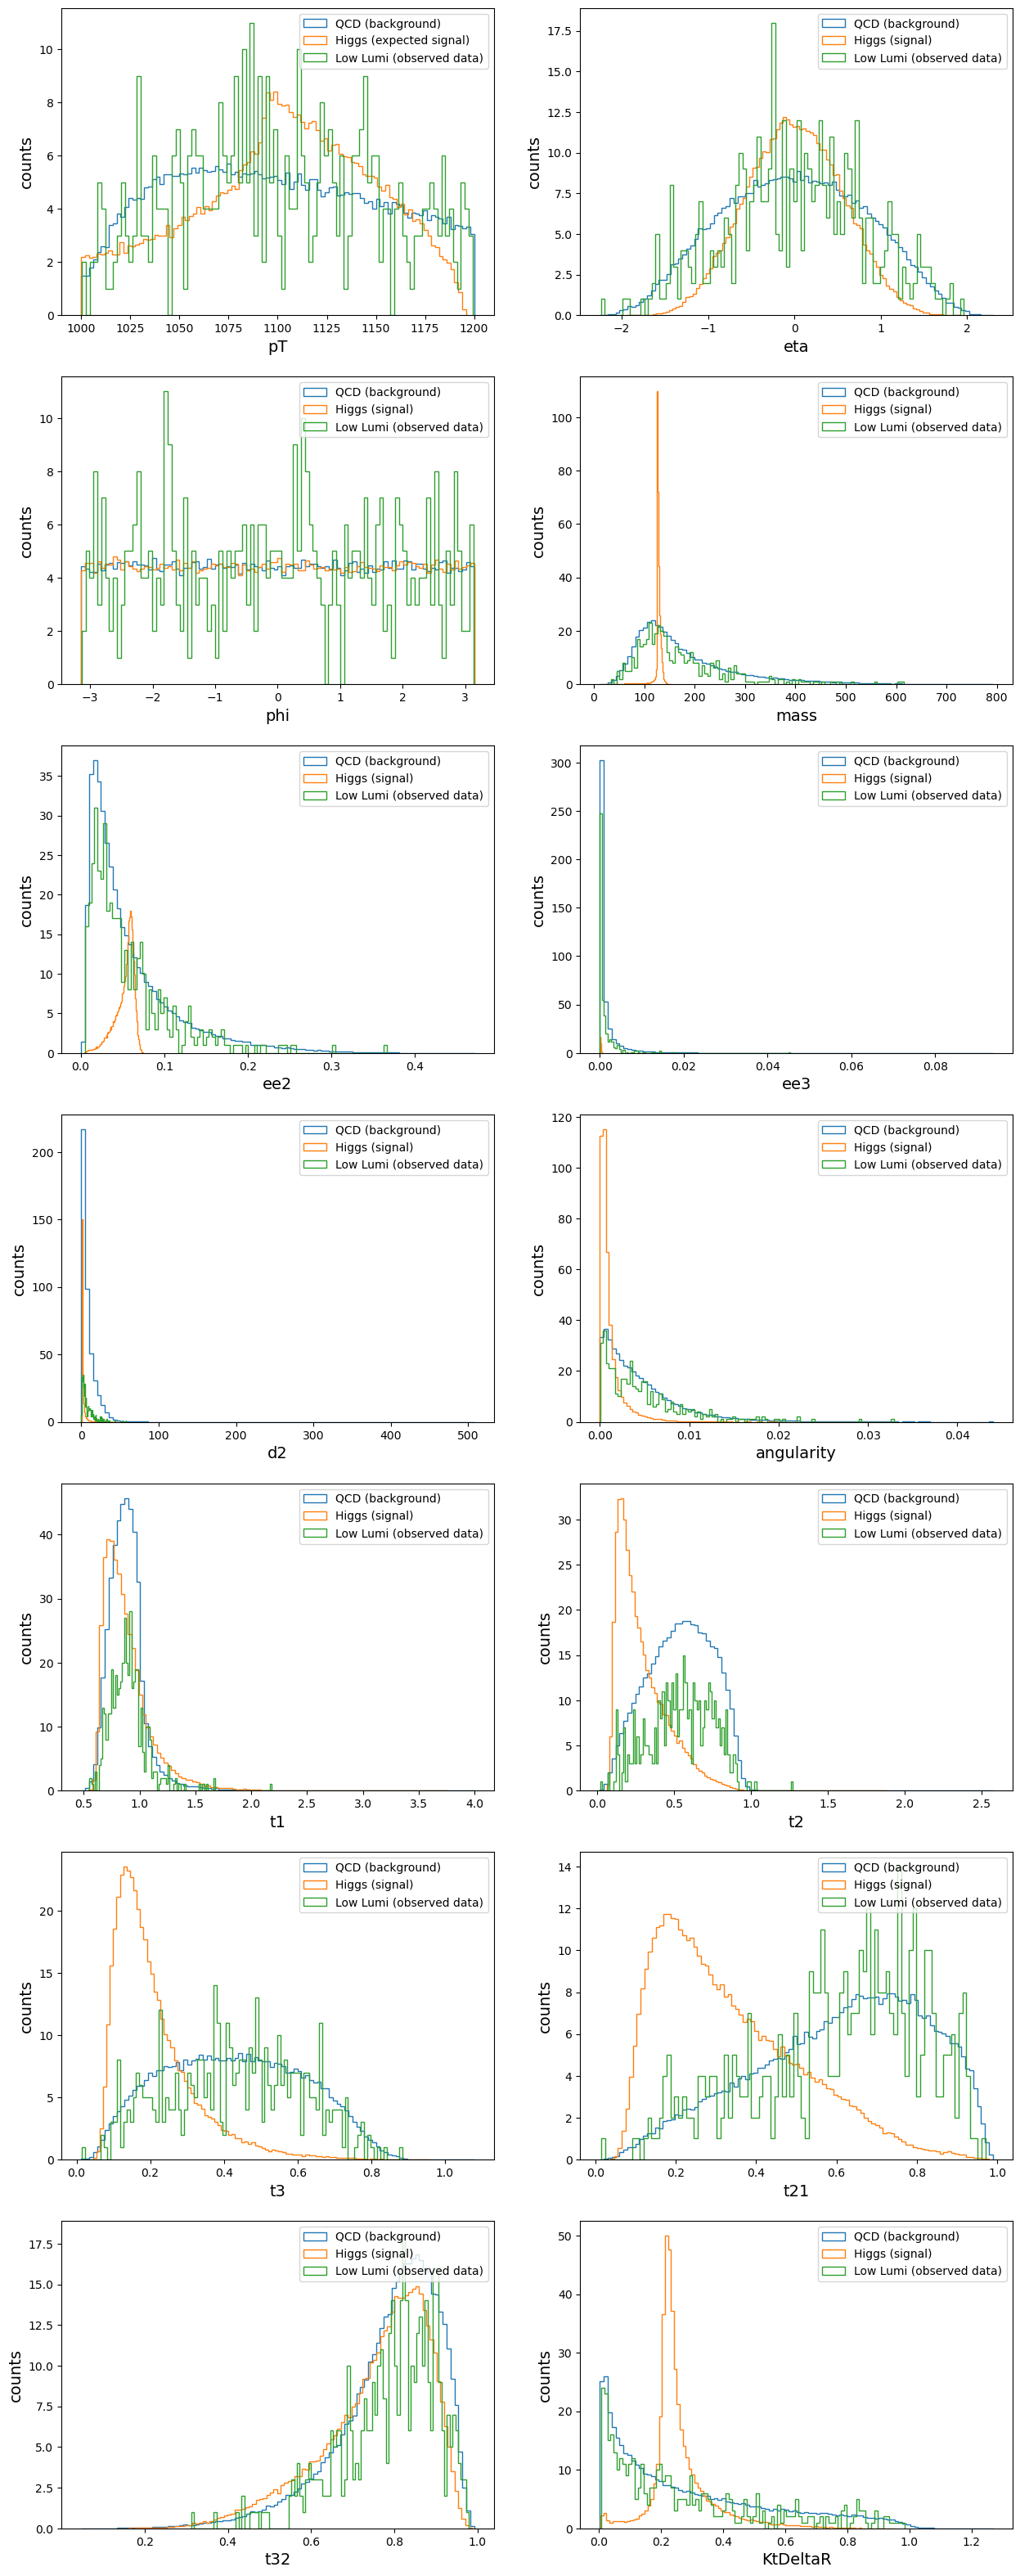

In [45]:
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist(pt_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[0,0].hist(pt_higgs, bins = 100, histtype = "step", label = ["Higgs (expected signal)"], weights = weights_lowLumi);
ax[0,0].hist(pt_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist(eta_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[0,1].hist(eta_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[0,1].hist(eta_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist(phi_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[1,0].hist(phi_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[1,0].hist(phi_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist(mass_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[1,1].hist(mass_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[1,1].hist(mass_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist(ee2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[2,0].hist(ee2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[2,0].hist(ee2_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist(ee3_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[2,1].hist(ee3_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[2,1].hist(ee3_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist(d2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[3,0].hist(d2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[3,0].hist(d2_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist(angularity_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[3,1].hist(angularity_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[3,1].hist(angularity_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist(t1_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[4,0].hist(t1_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[4,0].hist(t1_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist(t2_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[4,1].hist(t2_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[4,1].hist(t2_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist(t3_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[5,0].hist(t3_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[5,0].hist(t3_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist(t21_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[5,1].hist(t21_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[5,1].hist(t21_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist(t32_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[6,0].hist(t32_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[6,0].hist(t32_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist(KtDeltaR_qcd, bins = 100, histtype = "step", label = ["QCD (background)"], weights = weights_lowLumi);
ax[6,1].hist(KtDeltaR_higgs, bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = weights_lowLumi);
ax[6,1].hist(KtDeltaR_lowLumi, bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

As done in previous part, using the optimal mass cut (125, 129):

In [46]:
optimal_lowLumi = (mass_lowLumi > optimalMass_low) & (mass_lowLumi < optimalMass_high)
optimal_lowLumi_weight = pt_lowLumi[optimal_lowLumi].size/100000

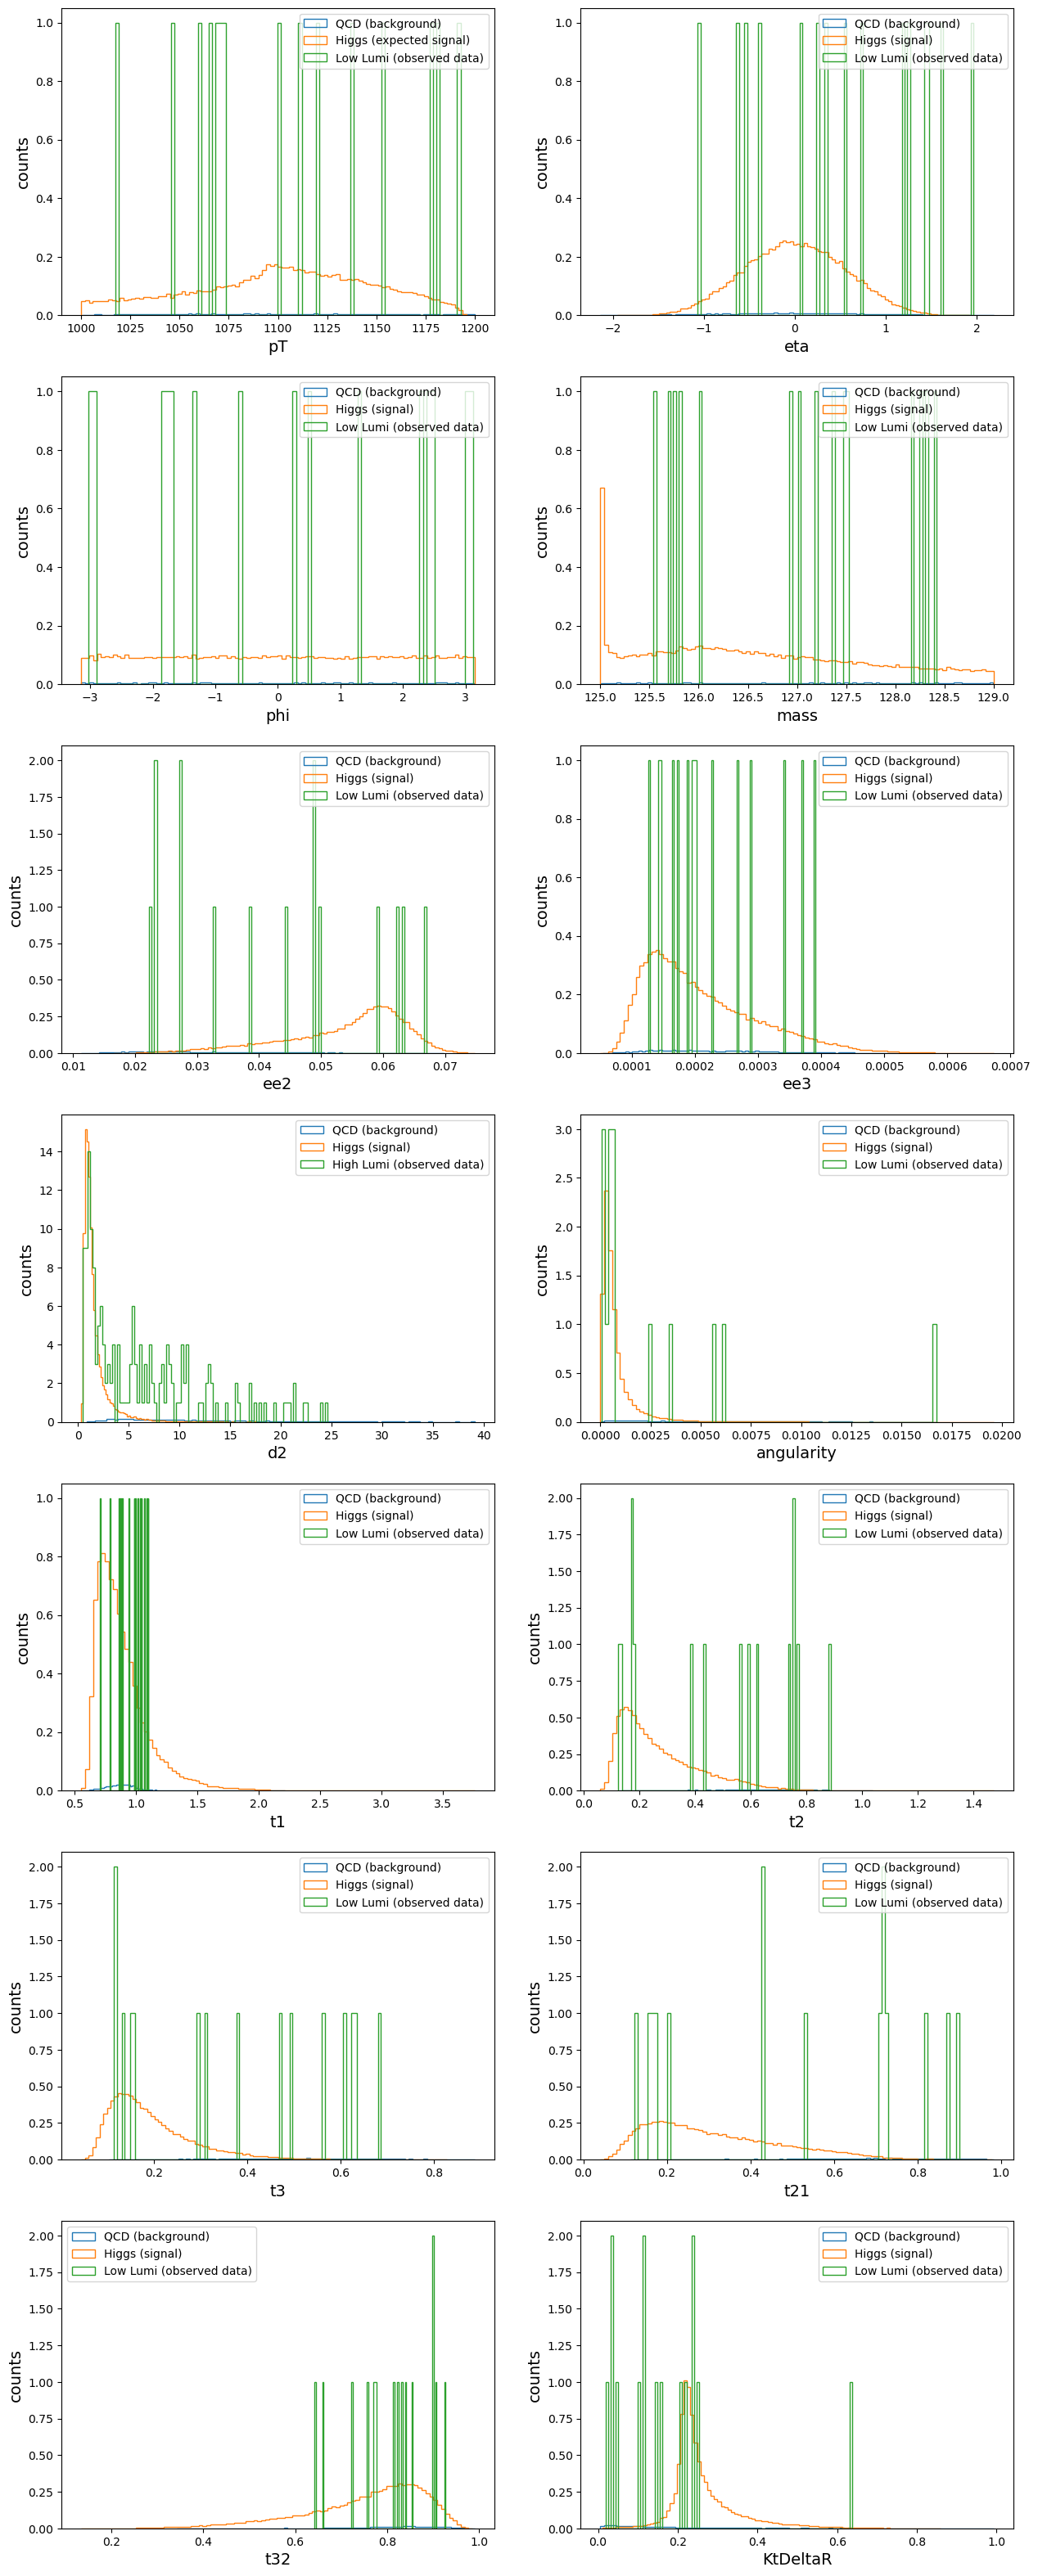

In [47]:
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist(pt_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(pt_qcd[optimal_qcd].size,optimal_lowLumi_weight));
ax[0,0].hist(pt_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (expected signal)"], weights = np.full(pt_higgs[optimal_higgs].size,optimal_lowLumi_weight));
ax[0,0].hist(pt_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist(eta_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(eta_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[0,1].hist(eta_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(eta_higgs[optimal_higgs].size,optimal_lowLumi_weight));
ax[0,1].hist(eta_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist(phi_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(phi_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[1,0].hist(phi_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(phi_higgs[optimal_higgs].size,optimal_lowLumi_weight));
ax[1,0].hist(phi_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist(mass_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(mass_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[1,1].hist(mass_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(mass_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[1,1].hist(mass_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist(ee2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(ee2_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[2,0].hist(ee2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(ee2_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[2,0].hist(ee2_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist(ee3_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(ee3_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[2,1].hist(ee3_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(ee3_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[2,1].hist(ee3_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist(d2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(d2_qcd[optimal_qcd].size, optimal_weight));
ax[3,0].hist(d2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(d2_qcd[optimal_higgs].size, optimal_weight));
ax[3,0].hist(d2_highLumi[optimal_highLumi], bins = 100, histtype = "step", label = ["High Lumi (observed data)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist(angularity_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(angularity_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[3,1].hist(angularity_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(angularity_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[3,1].hist(angularity_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist(t1_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t1_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[4,0].hist(t1_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t1_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[4,0].hist(t1_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist(t2_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t2_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[4,1].hist(t2_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t2_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[4,1].hist(t2_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist(t3_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t3_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[5,0].hist(t3_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t3_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[5,0].hist(t3_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist(t21_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t21_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[5,1].hist(t21_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t21_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[5,1].hist(t21_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist(t32_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(t32_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[6,0].hist(t32_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(t32_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[6,0].hist(t32_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist(KtDeltaR_qcd[optimal_qcd], bins = 100, histtype = "step", label = ["QCD (background)"], weights = np.full(KtDeltaR_qcd[optimal_qcd].size, optimal_lowLumi_weight));
ax[6,1].hist(KtDeltaR_higgs[optimal_higgs], bins = 100, histtype = "step", label = ["Higgs (signal)"], weights = np.full(KtDeltaR_higgs[optimal_higgs].size, optimal_lowLumi_weight));
ax[6,1].hist(KtDeltaR_lowLumi[optimal_lowLumi], bins = 100, histtype = "step", label = ["Low Lumi (observed data)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

Comparing expected significance vs observed significance:

In [49]:
def evalObservedSig_lowLumi_mass(low, high, total = 100000):
     
    counts_higgs = 0
    for i in mass_higgs:
        if (i > low and i <= high):
            counts_higgs = counts_higgs + 1
            
    counts_lowLumi = 0
    for k in mass_lowLumi:
        if (k > low and k <= high):
            counts_lowLumi = counts_lowLumi + 1
            
    N_higgs = counts_higgs* (50 / total)
    N_qcd = counts_lowLumi * (2050 / 442)
    
    sig = N_higgs / np.sqrt(N_qcd)
    
    return sig

In [60]:
print("Expected significance in mass cut (125,129): " + str(round(evalSig_mass(125,129),3)))
print("Observed significance in mass cut (125,129): " + str(round(evalObservedSig_lowLumi_mass(125,129),3)))

Expected significance in mass cut (125,129): 4.335
Observed significance in mass cut (125,129): 3.694


### Problem 8.3: 95% Confidence level of signal yields

Expected upper limit:

In [58]:
expected_CI = st.t.interval(alpha=0.95, df=len(mass_higgs)-1, loc=np.mean(mass_higgs), scale=st.sem(mass_higgs)) 
print("Expected 95% confidence level: " + str(expectedCI))

Expected 95% confidence level: (126.61171928877692, 126.71594516077013)


Observed upper limit:

In [59]:
observedCI = st.t.interval(alpha=0.95, df=len(mass_lowLumi)-1, loc=np.mean(mass_lowLumi), scale=st.sem(mass_lowLumi)) 
print("Observed 95% confidence level: " + str(observedCI))

Observed 95% confidence level: (162.521716964856, 179.743391977059)


The observed upper limit is higher (162.52) than the expected upper limit (126.61)